# 0. IMPORTS

## 0.1. Python Libraries

In [32]:
import inflection

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from IPython.display import Image

## 0.2. Helper Functions

### 0.2.1. Get Attributes

In [33]:
def get_numerical_attributes(data):
    return data.select_dtypes(include=['int64', 'float64'])

In [34]:
def get_categorical_attributes(data):
    return data.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### 0.2.2. Get Descriptive Info

In [35]:
def get_descriptive_info(data):
    num_attributes = get_numerical_attributes(data)
    
    # Central Tendency - mean, median
    df_mean = pd.DataFrame(num_attributes.apply(np.mean)).T
    df_median = pd.DataFrame(num_attributes.apply(np.median)).T
    
    # Dispersion - std, min, max, range, skew, kurtosis
    df_std = pd.DataFrame(num_attributes.apply(np.std)).T
    df_min = pd.DataFrame(num_attributes.apply(np.min)).T
    df_max = pd.DataFrame(num_attributes.apply(np.max)).T
    df_range = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
    df_skew = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
    df_kurtosis = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T
    
    #min, max, range, mean, median, std, skew, kurtosis
    df_descriptive_info = pd.concat([df_min, df_max, df_range, df_mean, df_median, df_std, df_skew, df_kurtosis]).T.reset_index()
    
    df_descriptive_info.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
    
    return df_descriptive_info

### 0.2.3. Find and Analyze Outliers

In [36]:
def find_and_analyze_outliers(data):
    num_attributes = get_numerical_attributes(data)
    
    Q1 = num_attributes.quantile(0.25)
    Q3 = num_attributes.quantile(0.75)
    IQR = Q3 - Q1
    
    inf_lim = Q1 - 1.5 * IQR
    sup_lim = Q3 + 1.5 * IQR
    
    outliers = ((num_attributes < inf_lim) | (num_attributes > sup_lim))
    
    outliers_count = outliers.sum()
    outliers_percentage = (outliers_count / len(num_attributes)) * 100
    
    df_outliers = data[outliers.any(axis=1)]
    
    df_outliers_analyze = pd.DataFrame({
        'Outliers Count' : outliers_count,
        'Outliers Percentage' : outliers_percentage
    })
    
    df_outliers_analyze = df_outliers_analyze[df_outliers_analyze['Outliers Count'] > 0]
    
    df_outliers_analyze = df_outliers_analyze.sort_values(by='Outliers Count', ascending = False)
    
    return df_outliers, df_outliers_analyze

## 0.3. Loading Data

In [37]:
df_train_raw = pd.read_csv('../data/train.csv', low_memory=False)

# 1. DESCRIPTION DATA

In [38]:
df1 = df_train_raw.copy()

In [39]:
df1.sample(5).T

,260104,324750,209375,327229,113304
id,260105,324751,209376,327230,113305
Gender,Female,Female,Male,Female,Male
Age,37,25,35,27,43
Driving_License,1,1,1,1,1
Region_Code,28.0,7.0,47.0,3.0,28.0
Previously_Insured,0,0,0,1,0
Vehicle_Age,1-2 Year,< 1 Year,1-2 Year,< 1 Year,1-2 Year
Vehicle_Damage,Yes,Yes,Yes,No,No
Annual_Premium,34540.0,30617.0,47444.0,22857.0,45952.0
Policy_Sales_Channel,26.0,152.0,124.0,152.0,26.0


## 1.1. Rename Columns

In [40]:
df1.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [41]:
df1.columns = df1.columns.map(lambda x: inflection.underscore(x))

In [42]:
df1.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

## 1.2. Data Dimension

In [43]:
print(f'Number of Rows {df1.shape[0]}')
print(f'Number of Features {df1.shape[1]}')

Number of Rows 381109
Number of Features 12


## 1.3. Data Types

In [44]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

## 1.4. Check NA

In [45]:
df1.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

## 1.5. Change Data Types

In [46]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

## 1.6. Descriptive Info

In [47]:
get_descriptive_info(df1)

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.691870,9.443274e-16,-1.200000
1,age,20.0,85.0,65.0,38.822584,36.0,15.511591,6.725390e-01,-0.565655
2,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-2.159518e+01,464.354302
3,region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-1.152664e-01,-0.867857
4,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
5,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087e+00,34.004569
6,policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-9.000081e-01,-0.970810
7,vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,3.029517e-03,-1.200688
8,response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906e+00,3.298788


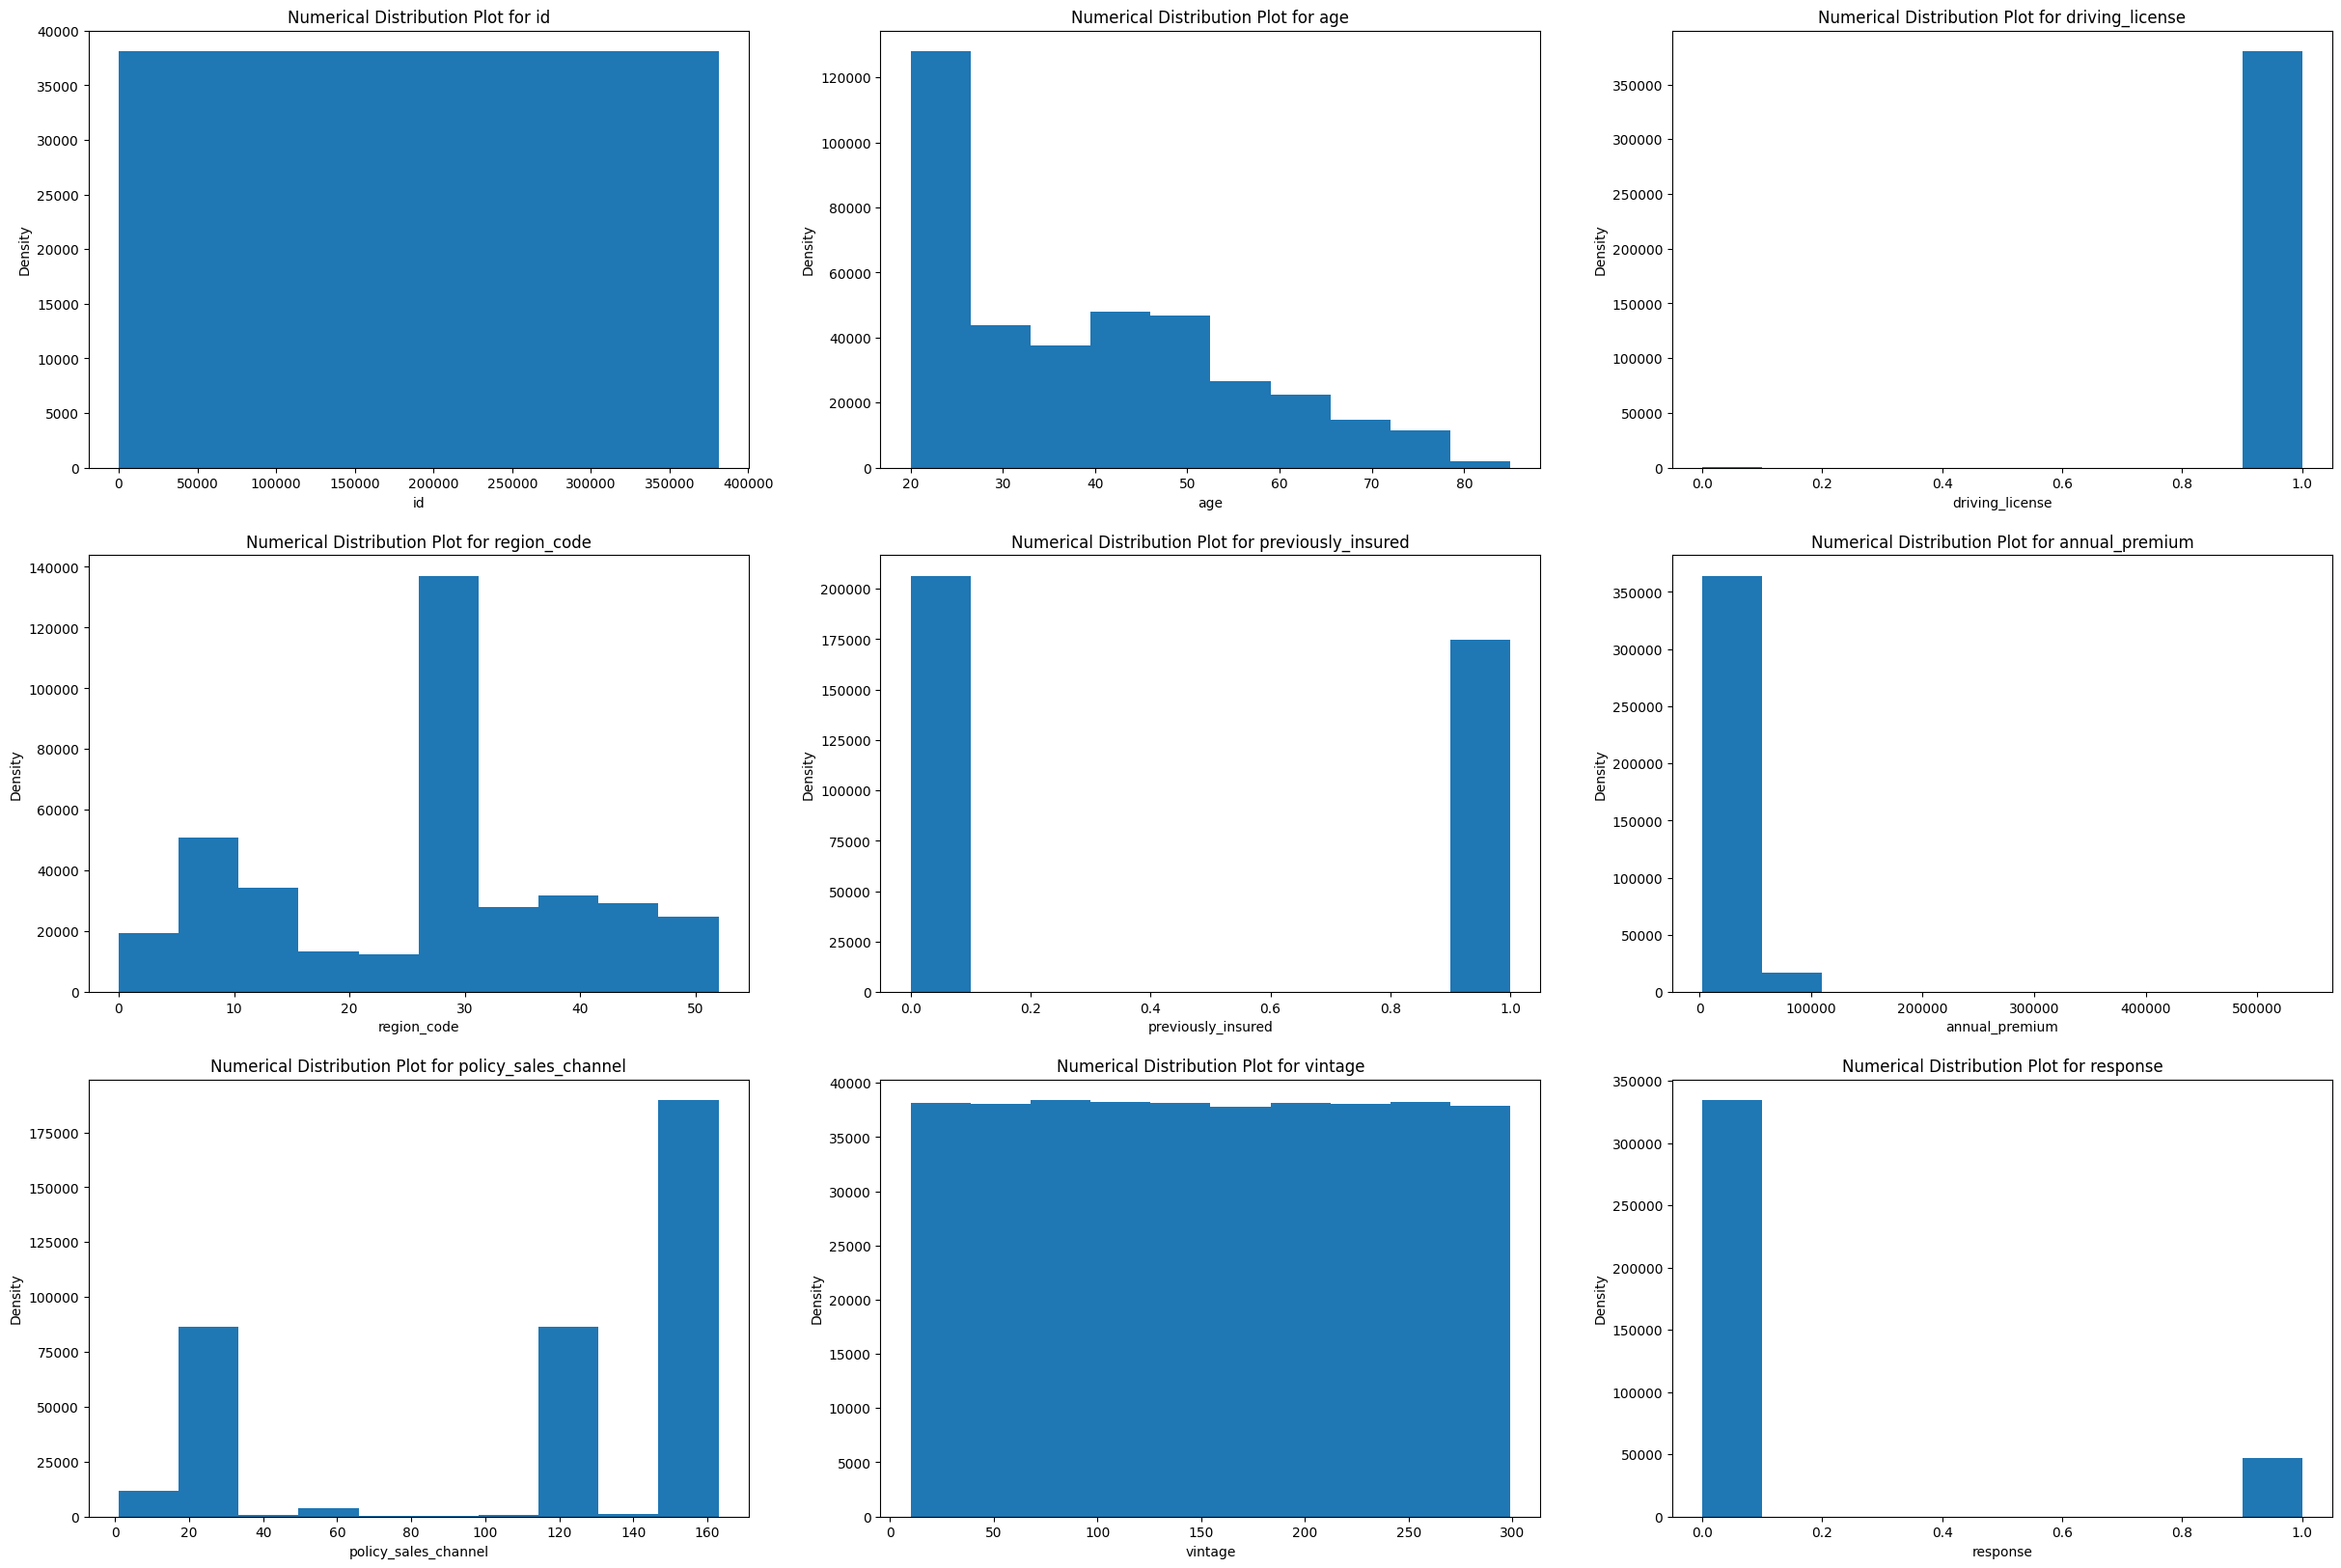

In [48]:
plt.figure(figsize=(30, 20))

for i, column in enumerate(get_numerical_attributes(df1).columns):
    plt.subplot(3, 3, i+1)
    plt.hist(df1[column]);
    plt.title(f'Numerical Distribution Plot for {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Density')

<Axes: xlabel='vehicle_age', ylabel='response'>

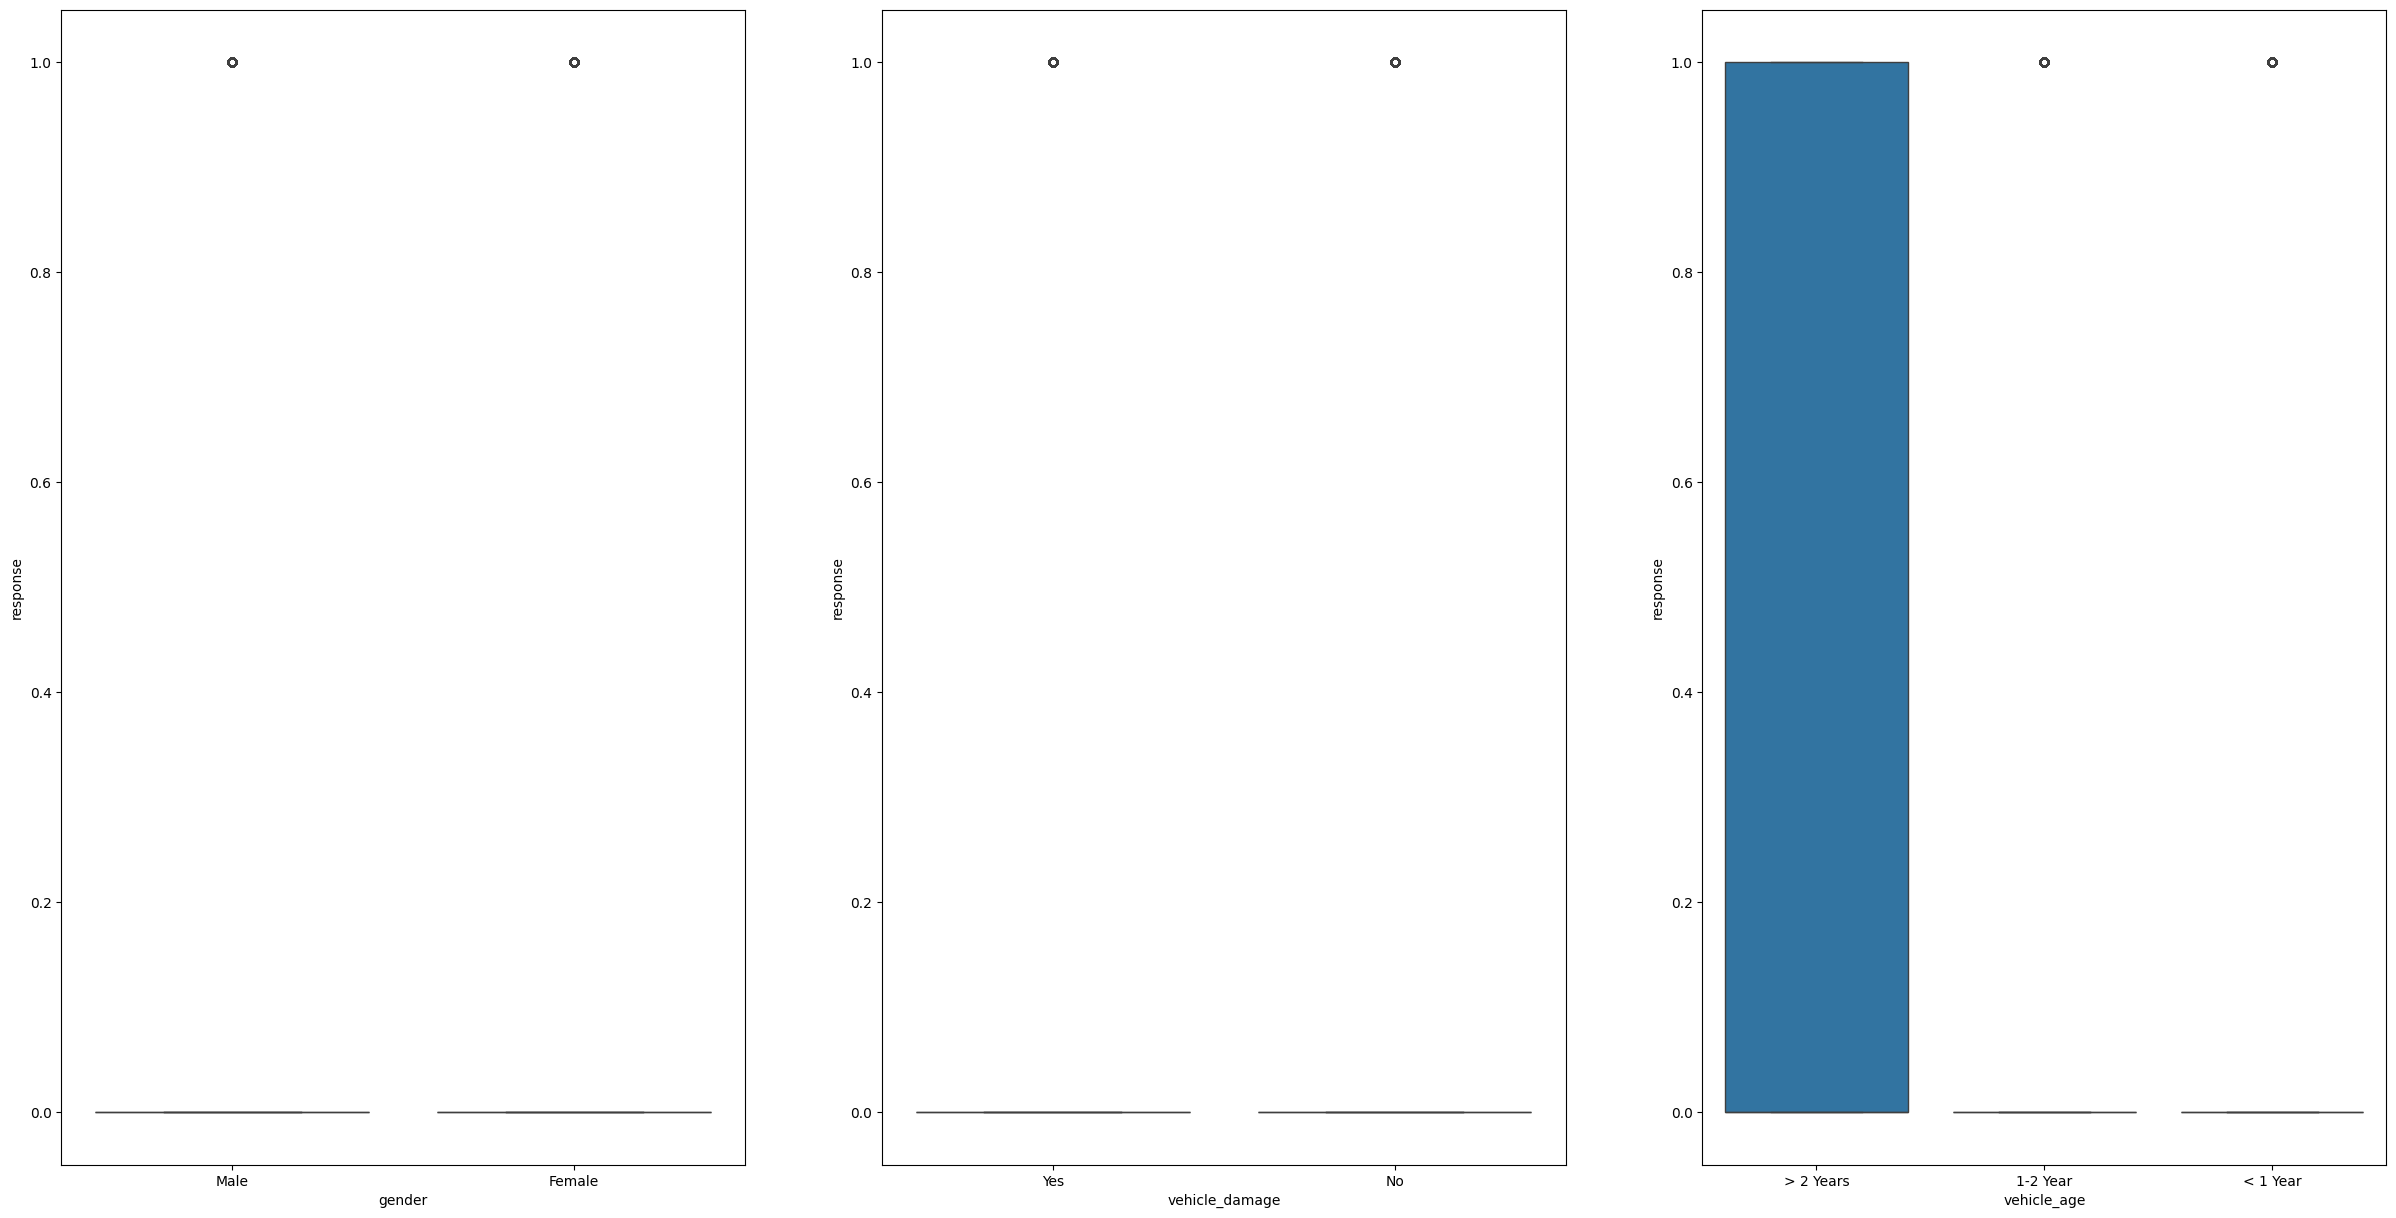

In [49]:
plt.figure(figsize=(30, 15))

plt.subplot(1, 3, 1)
sns.boxplot(x='gender', y='response', data=df1)

plt.subplot(1, 3, 2)
sns.boxplot(x='vehicle_damage', y='response', data=df1)

plt.subplot(1, 3, 3)
sns.boxplot(x='vehicle_age', y='response', data=df1)

## 1.7. Check Outliers

In [50]:
df_outliers, df_outliers_analyze = find_and_analyze_outliers(df1.drop(columns=['response']))

In [51]:
df_outliers_analyze

,Outliers Count,Outliers Percentage
annual_premium,10320,2.707887
driving_license,812,0.213062


In [52]:
df_outliers

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage
25,26,Female,21,1,28.0,1,< 1 Year,No,61964.0,152.0,72
37,38,Female,25,1,28.0,1,< 1 Year,No,76251.0,152.0,107
67,68,Male,60,1,28.0,0,1-2 Year,Yes,66338.0,124.0,73
139,140,Male,21,1,29.0,1,< 1 Year,No,62164.0,152.0,116
149,150,Female,22,1,11.0,1,< 1 Year,No,76651.0,152.0,258
...,...,...,...,...,...,...,...,...,...,...,...
380959,380960,Male,25,1,8.0,1,< 1 Year,No,61909.0,152.0,161
380998,380999,Female,33,1,8.0,0,1-2 Year,Yes,101664.0,124.0,21
381035,381036,Female,22,1,11.0,1,< 1 Year,No,62889.0,152.0,295
381047,381048,Female,52,1,8.0,1,1-2 Year,No,71915.0,7.0,233


# 2. HYPOTHESE INSIGHTS

In [53]:
df2 = df1.copy()

In [54]:
df2.sample(5).T

,182075,119468,222840,250118,29250
id,182076,119469,222841,250119,29251
gender,Female,Male,Male,Male,Male
age,77,26,23,59,26
driving_license,1,1,1,1,1
region_code,28.0,8.0,46.0,19.0,8.0
previously_insured,0,1,1,0,0
vehicle_age,1-2 Year,< 1 Year,< 1 Year,1-2 Year,< 1 Year
vehicle_damage,Yes,No,No,Yes,Yes
annual_premium,40975.0,35076.0,28235.0,31203.0,39691.0
policy_sales_channel,26.0,152.0,152.0,124.0,152.0


## 2.1. Mind Map Hypotheses

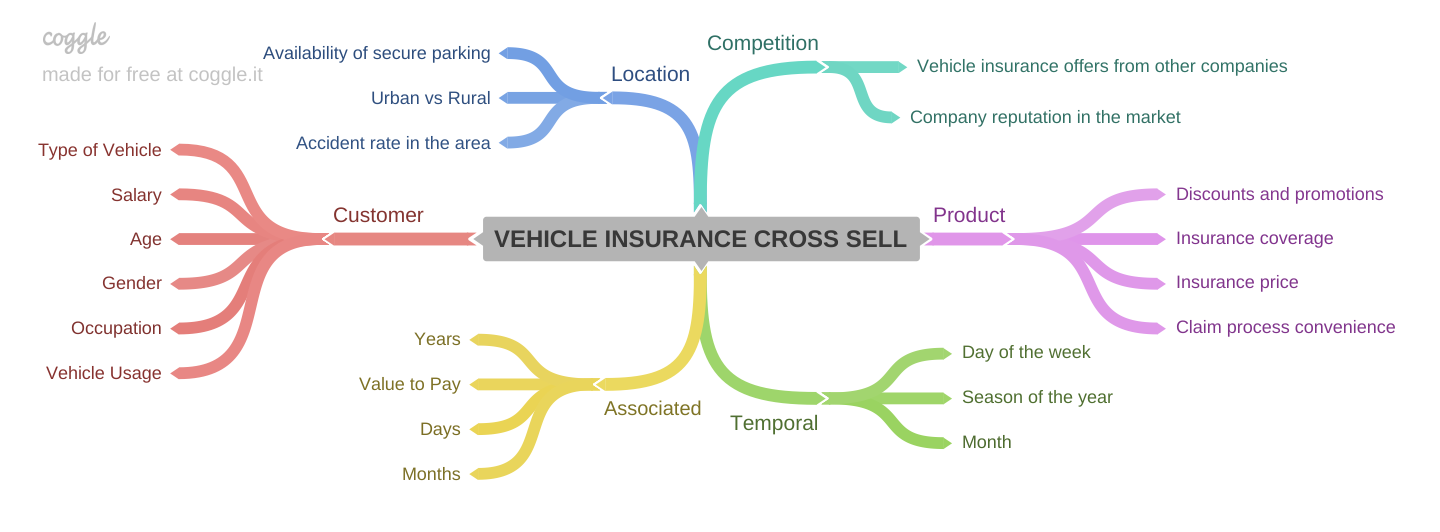

In [55]:
Image('../img/mind_map_hypotheses.png')

## 2.2. Hypotheses Creation